In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from collections import Counter

import scipy
from umap import UMAP
from sklearn.decomposition import PCA

In [2]:
# Stolen from Isabella
def fill_nan_encode_categories(dataframe):
    # replace nan with -1 -> to keep them recognisable
    result = dataframe.fillna(-1)
    # make all columns a category -> even the numerical ones as they are not continuous numbers
    result = result.astype('category')
    # use pd's codes to make them numeric -> -1 disappears this way
    return result.apply(lambda x: x.cat.codes)

In [3]:
raw_df = pd.read_csv("../data/maps-synthetic-data-v1.1.csv")

In [4]:
# columns = ['has_dep_diag',
#            'musi_week', 
#            'musi_wend', 
#            'read_week', 
#            'read_wend', 
#            'out_sum_week',
#            'out_sum_wend', 
#            'out_win_week', 
#            'out_win_wend'
#           ]

columns = ['has_dep_diag',
           'talk_mob_week',
           'talk_mob_wend',
           'text_week',
           'text_wend',
           'tv_week',
           'tv_wend',
           'comp_week',
           'comp_wend'
          ]

In [5]:
df = raw_df[columns]
df.shape

(13734, 9)

In [6]:
# Shamelessly stolen from Isabella
# replace nan with -1 -> to keep them recognisable
df = fill_nan_encode_categories(df)
df.columns

Index(['has_dep_diag', 'talk_mob_week', 'talk_mob_wend', 'text_week',
       'text_wend', 'tv_week', 'tv_wend', 'comp_week', 'comp_wend'],
      dtype='object')

## PCA / UMAP Analysis

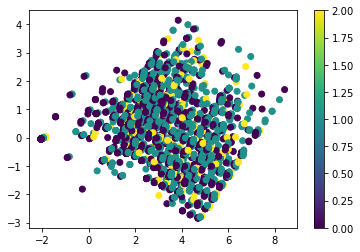

In [7]:
# PCA First

embedder = PCA()
embedder.fit(df)
embedding = embedder.transform(df)

plt.scatter(embedding[:,0],embedding[:,1], c=df['has_dep_diag'])
plt.colorbar()



Well that is not helpful at all

Try UMAP?

In [8]:
embedder = UMAP(n_neighbors=500,n_jobs=6,verbose=True)
embedder.fit(df, y=df['has_dep_diag'])
embedding = embedder.transform(df)

UMAP(n_jobs=6, n_neighbors=500, verbose=True)
Tue May  3 11:17:33 2022 Construct fuzzy simplicial set
Tue May  3 11:17:33 2022 Finding Nearest Neighbors
Tue May  3 11:17:33 2022 Building RP forest with 11 trees
Tue May  3 11:17:33 2022 NN descent for 14 iterations


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Tue May  3 11:17:48 2022 Finished Nearest Neighbor Search
Tue May  3 11:17:52 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Tue May  3 11:20:05 2022 Finished embedding


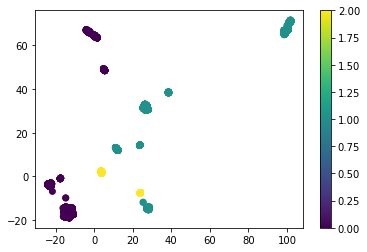

In [9]:
# 2 has depression, 1 does not, 0 is NaN

plt.scatter(embedding[:,0],embedding[:,1], c=df['has_dep_diag']) 
plt.colorbar()

In [10]:
from hdbscan import HDBSCAN

In [11]:
# embedding[df['has_dep_diag'] != 0 removes the NaN from the plot

clusterer = HDBSCAN(min_cluster_size=100)
cluster_labels = clusterer.fit_predict(embedding[df['has_dep_diag'] != 0,:])

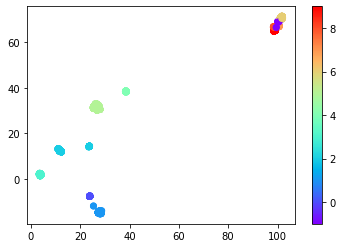

In [12]:
#  HDB sets -1 to noise
plt.scatter(embedding[df['has_dep_diag'] != 0,0],embedding[df['has_dep_diag'] != 0,1], c=cluster_labels, cmap='rainbow') 
plt.colorbar()

In [13]:
newdf = df[(df['has_dep_diag'] != 0)]#] & (df[cluster_labels] == 2)]
newdf = newdf[(cluster_labels == 2)]
newdf

,has_dep_diag,talk_mob_week,talk_mob_wend,text_week,text_wend,tv_week,tv_wend,comp_week,comp_wend
110,1,2,0,1,0,3,0,4,0
174,1,1,0,1,0,1,0,2,0
235,1,2,2,3,3,3,3,3,3
333,1,3,3,4,4,4,4,3,3
335,1,3,3,4,4,2,2,3,3
...,...,...,...,...,...,...,...,...,...
13339,1,2,0,3,0,1,0,2,0
13376,1,3,2,4,3,1,1,3,3
13586,1,2,2,3,3,4,4,3,3
13681,1,2,2,3,3,1,1,3,3
